In [ ]:
# Vasicek Model - a special case of Hull White Model
# r_t = r_0exp(-alpha*t) + sigmaexp(-alpha*t)Integral[0:t][exp(-alpha*s) dWs]
# Advantage  - has closed form solution
# Disadvantage Vasicek model -short rates can become negative

In [30]:
# Import modules 
import math
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [31]:
# Market, option,interest rate information and dynamics
r_0   = 0.05   # initial r(0) starting/known interest rate 
alpha = 0.2    # rate at which short rate tends toward long-term average
b     = 0.08   # long-term average short rate
sigma = 0.025  # volatility of short rate

# Monte Carlo Simulation dynamics
num_years       = 10 
num_simulations = 10
t               = np.array(range(0,num_years+1))


In [32]:
# Functions for modelling
def vasicek_mean(r_t1,t1,t2):
    return r_t1*np.exp(-alpha*(t2-t1)) + b*(1-np.exp(-alpha*(t2-t1)))

def vasicek_var(t1,t2):
    return (sigma**2/2*(alpha))*(1-np.exp(-2*alpha*(t2-t1)))

In [42]:
# Simulating N interest paths over t years 
np.random.seed(0)
Z               = norm.rvs(size = [num_simulations,num_years])
r_sim           = np.zeros([num_simulations,num_years+1])
r_sim[:,0]      = r_0
vasicek_means   = np.zeros(num_years+1)

for i in range(num_years):
    r_sim[:,i+1]= vasicek_mean(r_sim[:,i],t[i],t[i+1]) + np.sqrt(vasicek_var(t[i],t[i+1]))*Z[:,i]
vasicek_sr_means         = r_0*np.exp(-alpha*t) + b*(1-np.exp(-alpha*t))   #expected value of short rate at each time

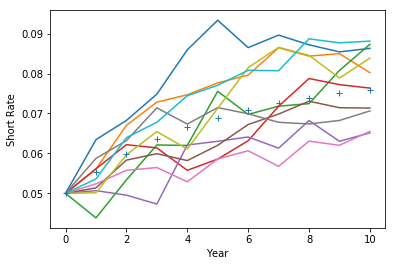

In [43]:
# Plot of simulation results

"""
t_graph = np.ones(r_sim.shape)*t
plt.plot(np.transpose(t_graph),np.transpose(r_sim*100),'r')
"""
for i in range(len(r_sim)):
    plt.plot(t,r_sim[i])
plt.plot(t,vasicek_sr_means,"+")
plt.xlabel("Year")
plt.ylabel("Short Rate")
plt.show()